# Portfolio Analyzer overview

Portfolio Analyzer is a python library built to make easy portfolio analysis. In this Notebook we are going to see few examples. First things first. You can install Portfolio Analyzer with pip, so

In [ ]:
%%bash
pip install git+https://github.com/Tokukawa/PortfolioAnalyzer.git

The first thing we need in order to analyze porfolio is data. We can use the function `yahoo2pandas`. This function take a list of tickers and return a pandas dataframe

In [1]:
from portfolio_analyzer.stocks_data_loader import yahoo2pandas

In [2]:
tickers = ['QQQ', 'GLD', 'IEF','VWO']
data = yahoo2pandas(tickers, frequency='monthly')

In [3]:
data.head()

,GLD,IEF,QQQ,VWO
formatted_date,,,,
2005-03-01,42.820000,83.690002,36.570000,23.600000
2005-04-01,43.349998,85.510002,34.980000,23.049999
2005-05-01,41.650002,86.809998,38.080002,23.719999
2005-06-01,43.439999,86.959999,36.779999,24.540001
2005-07-01,42.820000,84.800003,39.580002,26.250000


By default `yahoo2pandas` return all possible data from yahoo. You can specify range of time you want and the frequency. Once we obtained the data, we can optimize our portfolio according to some most common algorithms. Up this moment you can use only `minimal_variance`, `risk_parity` and `approximated_max_kelly`.

In [4]:
from portfolio_analyzer.optimizers import approximated_max_kelly, minimal_variance, risk_parity

In [5]:
minimal_variance(data)

,GLD,IEF,QQQ,VWO
0,-0.008877,0.833861,0.166436,0.008581


In [6]:
risk_parity(data)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.50088759657e-13
            Iterations: 26
            Function evaluations: 156
            Gradient evaluations: 26


,GLD,IEF,QQQ,VWO
0,0.140638,0.580635,0.171034,0.107694


In [7]:
approximated_max_kelly(data)

,GLD,IEF,QQQ,VWO
0,0.293458,0.401597,0.647199,-0.342254


We can see how our portfolio would perform with `NaiveBackTest`.

In [9]:
from portfolio_analyzer.backtest import NaiveBackTest
from portfolio_analyzer.utils import portfolio2dic

In [10]:
my_portfolio = portfolio2dic(risk_parity(data))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.11034209127e-15
            Iterations: 29
            Function evaluations: 174
            Gradient evaluations: 29


In [11]:
backtest = NaiveBackTest(my_portfolio, data)

In [12]:
risk_parity_backtest = backtest.run()

We can perform some measures on the back test and we can plot it.

In [13]:
%matplotlib inline
from portfolio_analyzer.metrics import MainMetrics

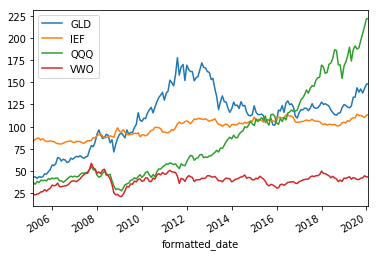

In [15]:
data.plot()

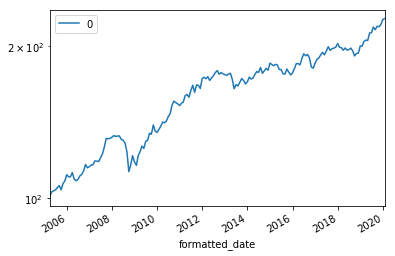

In [18]:
risk_parity_backtest.plot(logy=True)

In [19]:
benchmark_data = yahoo2pandas(['VTI'])
measures = MainMetrics(benchmark=benchmark_data)

In [20]:
MainMetrics(benchmark_data).estimate(risk_parity_backtest)

,0
alpha,0.057112
benchmark correlation,-0.091762
max draw down,-0.151544
sharpe ratio,0.254838


Now that we are happy with our portfolio, we can rabalance it in function of the market current fluctuations.

In [21]:
from portfolio_analyzer.balancer import Rebalance

In [22]:
portfolio_exposure = {  # the number of stock I have currently in my portfolio.
    'VTI': 11, 
    'TLT': 22, 
    'GLD': 33
}

extra_cash = 123.

optimal_weights = portfolio2dic(approximated_max_kelly(data))

In [23]:
rebalancer = Rebalance(portfolio_exposure, optimal_weights, extra_cash)

In [24]:
new_exposure, balance = rebalancer.compute()

In [25]:
new_exposure, balance

({'GLD': 20, 'IEF': 36, 'QQQ': 29, 'VWO': -78}, 10029.160140991211)

Now I can know how much I should sell or buy of every ticker:

In [26]:
rebalancer.diff(new_exposure)

{'GLD': -13.0,
 'IEF': 36.0,
 'QQQ': 29.0,
 'TLT': -22.0,
 'VTI': -11.0,
 'VWO': -78.0}